# 1. Data Preparation

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
stock_data = pd.read_csv('dataset/stock_data.csv')

# Display data info
print(stock_data.head())

# count the number of sentiment is 1 
print(stock_data[stock_data['Sentiment'] == 1].count())
print(stock_data[stock_data['Sentiment'] == -1].count())

                                                Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1
Text         3685
Sentiment    3685
dtype: int64
Text         2106
Sentiment    2106
dtype: int64


# 2. Text Preprocessing

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

stock_data['processed_text'] = stock_data['Text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/phamtheanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phamtheanh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 3. Feature Extraction

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(stock_data['processed_text'])
y = stock_data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Training & Evaluation

# 4.1. Define Training Model & Evaluation Function
- Logistic Regression
- Random Forest
- SVM (Support Vector Machine)
- Naive Bayes
- Decision Tree
- KNN (K-Nearest Neighbors)
- Neural Network
- XGBoost

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Store original labels
original_labels = np.unique(y)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Create a mapping of encoded labels to original labels
label_mapping = dict(zip(range(len(original_labels)), original_labels))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, name):
    print(f"Evaluating {name}...")
    
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Average cross-validation score: {scores.mean():.4f}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=[str(label_mapping[i]) for i in range(len(original_labels))]))
    print("="*50)
    
    return scores.mean(), accuracy

# Logistic Regression
def logistic_regression():
    model = LogisticRegression(random_state=42)
    return evaluate_model(model, "Logistic Regression")

# Random Forest
def random_forest():
    model = RandomForestClassifier(random_state=42)
    return evaluate_model(model, "Random Forest")

# SVM
def svm():
    model = SVC(random_state=42)
    return evaluate_model(model, "SVM")

# Naive Bayes
def naive_bayes():
    model = MultinomialNB()
    return evaluate_model(model, "Naive Bayes")

# Decision Tree
def decision_tree():
    model = DecisionTreeClassifier(random_state=42)
    return evaluate_model(model, "Decision Tree")

# K-Nearest Neighbors
def knn():
    model = KNeighborsClassifier()
    return evaluate_model(model, "K-Nearest Neighbors")

# Neural Network
def neural_network():
    model = MLPClassifier(random_state=42, max_iter=1000)
    return evaluate_model(model, "Neural Network")

# XGBoost
def xgboost():
    model = XGBClassifier(random_state=42, use_label_encoder=False)
    return evaluate_model(model, "XGBoost")

# 4.2. Run Models & Find the Best Model

Evaluating Logistic Regression...
Cross-validation scores: [0.76159655 0.74541532 0.77645788 0.76349892 0.74190065]
Average cross-validation score: 0.7578
Accuracy: 0.7834

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.52      0.64       427
           1       0.77      0.94      0.85       732

    accuracy                           0.78      1159
   macro avg       0.80      0.73      0.74      1159
weighted avg       0.79      0.78      0.77      1159

Evaluating Random Forest...
Cross-validation scores: [0.76591154 0.76914779 0.77429806 0.78401728 0.76241901]
Average cross-validation score: 0.7712
Accuracy: 0.7947

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.69       427
           1       0.80      0.90      0.85       732

    accuracy                           0.79      1159
   macro avg       0.79      0.76      0.77      1159
weighted avg   

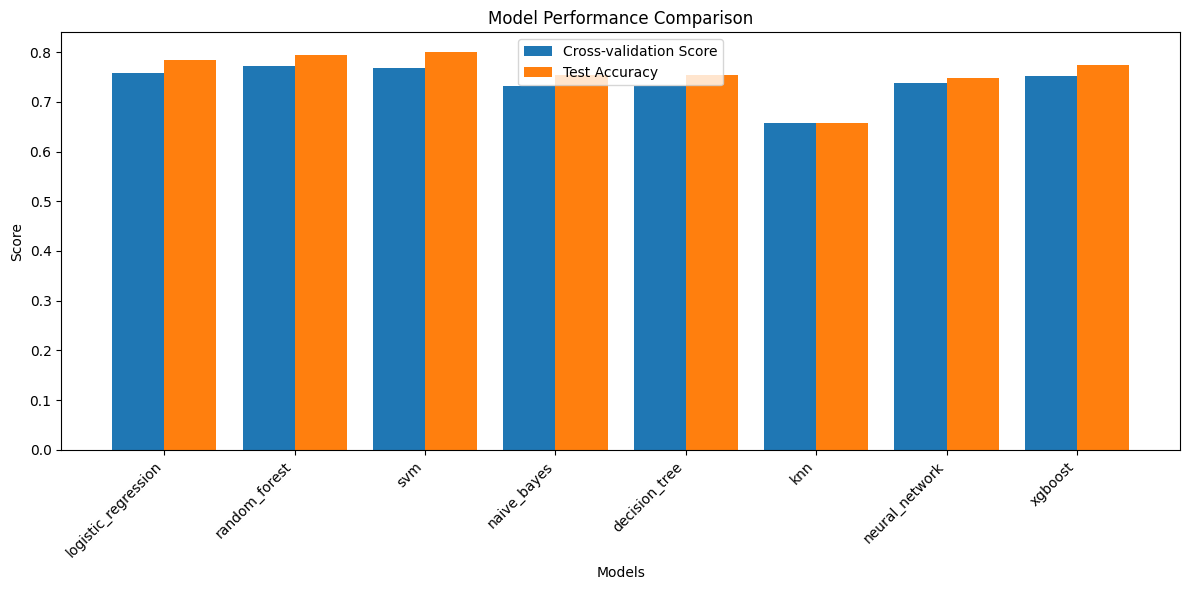


Best performing model: svm
Cross-validation score: 0.7679
Test accuracy: 0.7998


In [34]:
# Run all models
models = [
    logistic_regression,
    random_forest,
    svm,
    naive_bayes,
    decision_tree,
    knn,
    neural_network,
    xgboost
]

results = {}
for model_func in models:
    cv_score, test_accuracy = model_func()
    results[model_func.__name__] = (cv_score, test_accuracy)

# Plotting results
model_names = list(results.keys())
cv_scores = [score for score, _ in results.values()]
test_accuracies = [accuracy for _, accuracy in results.values()]

plt.figure(figsize=(12, 6))
x = range(len(model_names))
plt.bar([i - 0.2 for i in x], cv_scores, width=0.4, label='Cross-validation Score', align='center')
plt.bar([i + 0.2 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Find best model
best_model = max(results, key=lambda k: results[k][1])  # Based on test accuracy
print(f"\nBest performing model: {best_model}")
print(f"Cross-validation score: {results[best_model][0]:.4f}")
print(f"Test accuracy: {results[best_model][1]:.4f}")